### 0.相关图像基础了解

```
    1. opencv安装与了解
    2. 图像基础知识了解
    3. 淘宝图像￥符号定位查找
    4. 身份证数字分割
    
```

img.shape : (2462, 2160, 3)


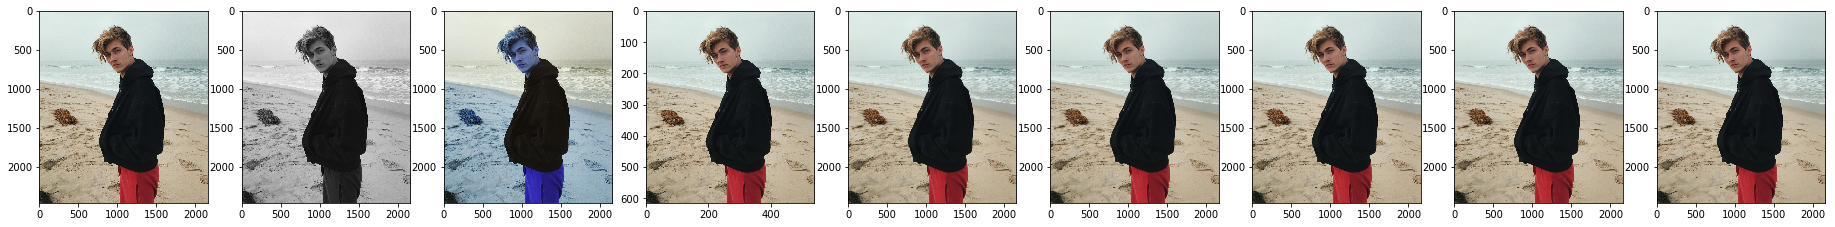

In [30]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("image/test.png")
print("img.shape : {}".format(img.shape))
img_h,img_w,img_channel_num = img.shape

# plt 读取顺序是 BGR 
f,(ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8) = plt.subplots(1,9,figsize=(32,12*9))
# f,(ax0,ax1,ax2,ax3) = plt.subplots(1,4,figsize=(12,12*3))

ax0.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
ax1.imshow(img[:,:,1],cmap='gray')
ax2.imshow(img)

# RGB, 宽度缩放 
resizeImg = cv2.cvtColor(cv2.resize(img,(img_w//4,img_h//4)),cv2.COLOR_BGR2RGB)
ax3.imshow(resizeImg)


# 2D 滤波
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)
dst = cv2.cvtColor(dst,cv2.COLOR_BGR2RGB)
ax4.imshow(dst)

#  卷积模糊
dst = cv2.blur(img,(5,5))
dst = cv2.cvtColor(dst,cv2.COLOR_BGR2RGB)
ax5.imshow(dst)

# 高斯模糊
dst = cv2.GaussianBlur(img,(5,5),0)
dst = cv2.cvtColor(dst,cv2.COLOR_BGR2RGB)
ax6.imshow(dst)

# 中值模糊
dst = cv2.medianBlur(img,5)
dst = cv2.cvtColor(dst,cv2.COLOR_BGR2RGB)
ax7.imshow(dst)

# 双边滤波
dst = cv2.bilateralFilter(img,9,75,75)
dst = cv2.cvtColor(dst,cv2.COLOR_BGR2RGB)
ax8.imshow(dst)


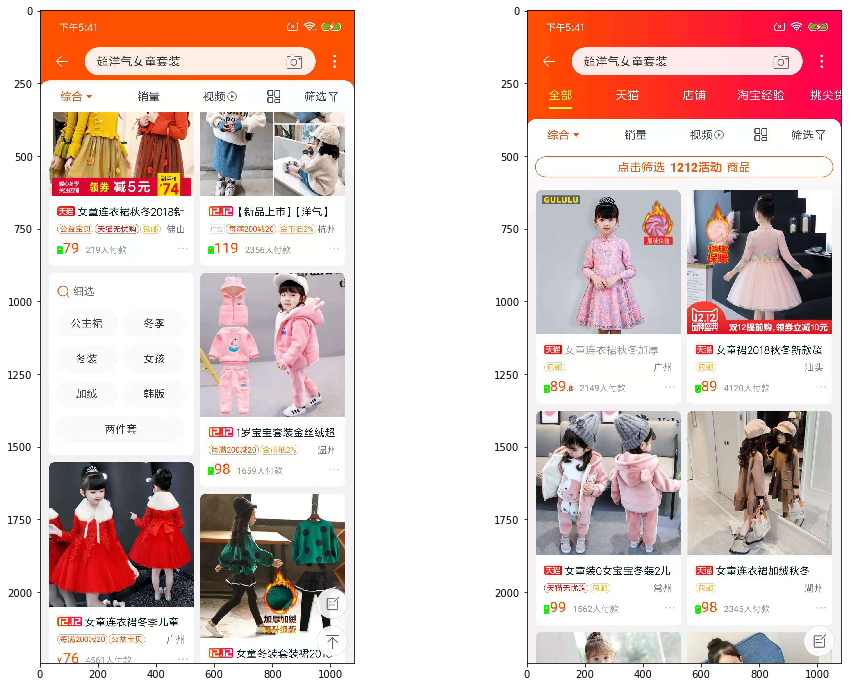

In [31]:
import imutils
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt


def getRMB(img,threshold_w = [10,15],threshold_h = [19,23],threshold_data = [180,195],threshold_xmin=[50,80,570,590]):
    """
    用于定位￥符号位置
    img : 原始cv读取的图像
    threshold_w : ￥宽度范围
    threshold_h : ￥高度范围
    threshold_xmin : ￥出现的位置范围
    """
    img_gray = img[:,:,0]
    ret, binary = cv2.threshold(img_gray,115,255,cv2.THRESH_BINARY)
    cnts= cv2.findContours(binary.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if imutils.is_cv2() else cnts[1]
    positions = []
    for index,c in enumerate(cnts):
        x,y,w,h = cv2.boundingRect(c)
        xmin,ymin,xmax,ymax = x,y,x+w,y+h
        if threshold_xmin[0]<xmin<threshold_xmin[1] or threshold_xmin[2]<xmin<threshold_xmin[3]:
            if threshold_h[0]<h<threshold_h[1] and threshold_w[0]<w<threshold_h[1] :
                data = np.mean(img[ymin:ymax,xmin:xmax])
                if threshold_data[0]<data<threshold_data[1]:
                    positions.append([xmin,ymin,xmax,ymax])
    return positions



def rectangleImg(img,positions):
    for position in positions:
        xmin,ymin,xmax,ymax = position
        xmed,ymed = (xmin+xmax)//2,(ymin+ymax)//2
        cv2.rectangle(img,(xmin,ymin),(xmax,ymax),(0,255,0),5)
    return img

            
    



img1 = cv2.imread('image/taobao_1.png')
positions1 = getRMB(img1)
img1 = rectangleImg(img1,positions1)


img2 = cv2.imread('image/taobao_2.png')
positions2 = getRMB(img2)
img2 = rectangleImg(img2,positions2)


# 显示结果
f,(ax1,ax2) = plt.subplots(1,2,figsize=(16,12))
ax1.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)) 
ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)) 


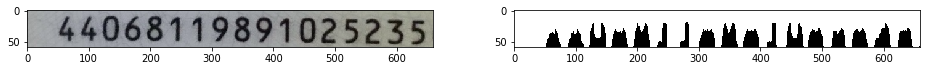

In [35]:

import cv2  
import numpy as np  
from matplotlib import pyplot as plt  
from PIL import Image

def horizontalrojection(img):
    img_h,img_w,_ = img.shape
    GrayImage=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret,thresh1=cv2.threshold(GrayImage,120,255,cv2.THRESH_BINARY)
    
    newImg = np.ones((img_h,img_w))*255
    a = [0]*img_w


    for j in range(img_w):
        for i in range(img_h):
            if  thresh1[i,j]==0:
                a[j]+=1
    for i in range(img_w):
        newImg[img_h-a[i]:,i] = 0
    return newImg
    
img = cv2.imread('image/img_id.png') 
newImg = horizontalrojection(img)

f,(ax1,ax2) = plt.subplots(1,2,figsize=(16,12))

ax1.imshow(img,cmap='gray')
ax2.imshow(newImg,cmap='gray')

### 1. Numpy CNN  可视化效果实现

In [21]:
import numpy
import sys


def conv_(img, conv_filter):
    filter_num,filter_size = conv_filter.shape
    img_h,img_w = img.shape
    result = numpy.zeros((img_h,img_w))    
    start_index = int(filter_size/2.0)
    h_range,w_range = int(img_h-filter_size/2.0+1),int(img_w-filter_size/2.0+1)
    for r in range(start_index, h_range):
        for c in range(start_index, w_range):
            img_h_start_index,img_h_end_index = r-int(numpy.floor(filter_size/2.0)),r+int(numpy.ceil(filter_size/2.0))
            img_w_start_index,img_w_end_index = c-int(numpy.floor(filter_size/2.0)),c+int(numpy.ceil(filter_size/2.0))
            curr_region = img[img_h_start_index:img_h_end_index,img_w_start_index:img_w_end_index]
            curr_result = curr_region * conv_filter
            conv_sum = numpy.sum(curr_result)
            result[r, c] = conv_sum 
    result_h,result_w = result.shape
    final_result = result[int(filter_size/2.0):result_h-int(filter_size/2.0), int(filter_size/2.0):result_w-int(filter_size/2.0)]
    return final_result


def conv(img, conv_filter):
    img_h,img_w = img.shape[0:2]
    filter_num,filter_size = conv_filter.shape[0],conv_filter.shape[1]
    feature_maps = numpy.zeros((img_h-filter_size+1,img_w-filter_size+1,filter_num))
    for filter_index in range(filter_num):
        curr_filter = conv_filter[filter_index, :]
        if len(curr_filter.shape) > 2:
            conv_map = conv_(img[:, :, 0], curr_filter[:, :, 0])
            for ch_num in range(1, curr_filter.shape[-1]):
                conv_map = conv_map + conv_(img[:, :, ch_num],curr_filter[:, :, ch_num])
        else:
            conv_map = conv_(img, curr_filter)
        feature_maps[:, :, filter_index] = conv_map
    return feature_maps
    

def pooling(feature_map, size=2, stride=2):
    
    feature_h,feature_w,feature_num = feature_map.shape[0],feature_map.shape[1],feature_map.shape[-1]
    out_feature_h,out_feature_w = int((feature_h-size+1)/stride+1),int((feature_w-size+1)/stride+1)
    pool_out = numpy.zeros((out_feature_h,out_feature_w,feature_num))
    for map_num in range(feature_num):
        r2 = 0
        for r in numpy.arange(0,feature_h-size+1, stride):
            c2 = 0
            for c in numpy.arange(0, feature_w-size+1, stride):
                pool_out[r2, c2, map_num] = numpy.max([feature_map[r:r+size,  c:c+size, map_num]])
                c2 = c2 + 1
            r2 = r2 +1
    return pool_out


def relu_(Z):
    return numpy.maximum(0,Z)

def relu(feature_map):
    feature_h,feature_w,feature_num = feature_map.shape
    relu_out = numpy.zeros((feature_h,feature_w,feature_num))
    for map_num in range(feature_num):
        for r in range(feature_h):
            for c in range(feature_w):
                relu_out[r, c, map_num] = relu_(feature_map[r, c, map_num])
    return relu_out

finish conv1 feature_map.shape:(372, 334, 2)
finish conv2 feature_map.shape:(184, 165, 3)
finish conv3 feature_map.shape:(90, 81, 1)


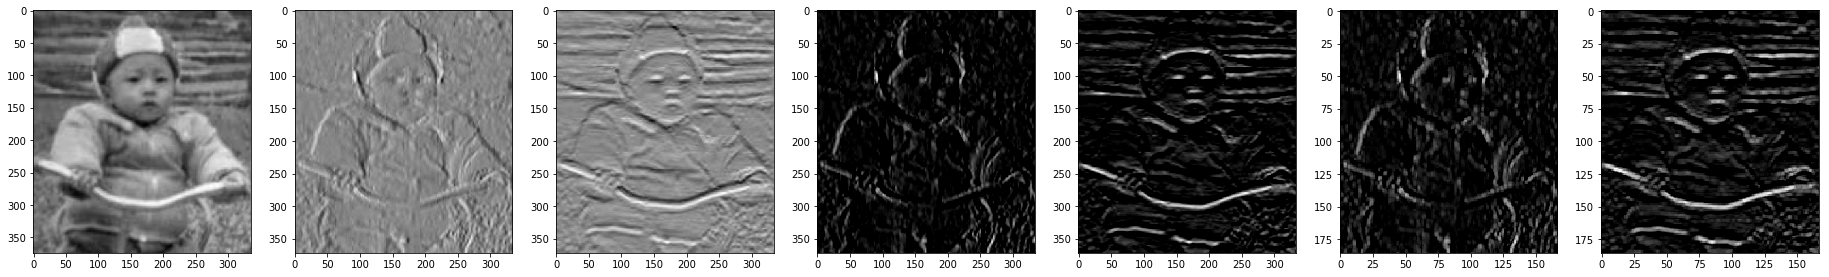

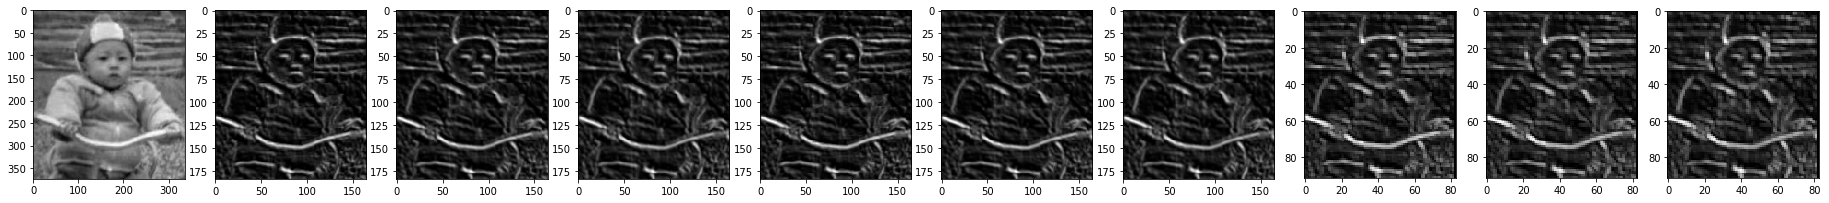

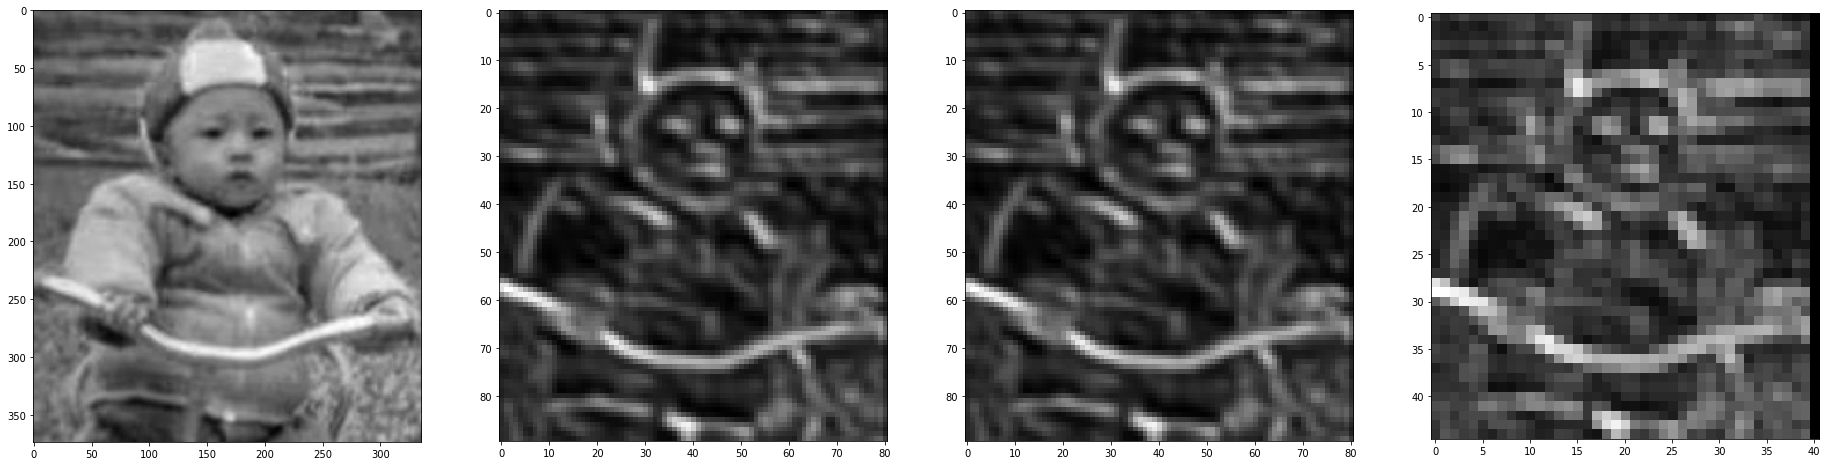

In [22]:
import skimage.data
import numpy
import matplotlib
from matplotlib import pyplot as plt
import cv2


img = cv2.imread("image/test_cnn.png")[:,:,0]


l1_filter = numpy.zeros((2,3,3))
l1_filter[0, :, :] = numpy.array([[[-1, 0, 1], 
                                   [-1, 0, 1], 
                                   [-1, 0, 1]]])
l1_filter[1, :, :] = numpy.array([[[1,   1,  1], 
                                   [0,   0,  0], 
                                   [-1, -1, -1]]])



#l1_filter = numpy.random.rand(2, 3, 3)


l1_feature_map = conv(img, l1_filter)
l1_feature_map_relu = relu(l1_feature_map)
l1_feature_map_relu_pool = pooling(l1_feature_map_relu, 2, 2)
f,(ax0,ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(1,7,figsize=(32,32*7))
ax0.imshow(img,cmap='gray')
ax1.imshow(l1_feature_map[:,:,0],cmap='gray')
ax2.imshow(l1_feature_map[:,:,1],cmap='gray')
ax3.imshow(l1_feature_map_relu[:,:,0],cmap='gray')
ax4.imshow(l1_feature_map_relu[:,:,1],cmap='gray')
ax5.imshow(l1_feature_map_relu_pool[:,:,0],cmap='gray')
ax6.imshow(l1_feature_map_relu_pool[:,:,1],cmap='gray')
print("finish conv1 feature_map.shape:{}".format(l1_feature_map.shape))




l2_filter = numpy.random.rand(3, 3, 3, l1_feature_map_relu_pool.shape[-1])
l2_feature_map = conv(l1_feature_map_relu_pool, l2_filter)
l2_feature_map_relu = relu(l2_feature_map)
l2_feature_map_relu_pool = pooling(l2_feature_map_relu, 2, 2)

f,(ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9) = plt.subplots(1,10,figsize=(32,32*10))
ax0.imshow(img,cmap='gray')
ax1.imshow(l2_feature_map[:,:,0],cmap='gray')
ax2.imshow(l2_feature_map[:,:,1],cmap='gray')
ax3.imshow(l2_feature_map[:,:,2],cmap='gray')
ax4.imshow(l2_feature_map_relu[:,:,0],cmap='gray')
ax5.imshow(l2_feature_map_relu[:,:,1],cmap='gray')
ax6.imshow(l2_feature_map_relu[:,:,2],cmap='gray')
ax7.imshow(l2_feature_map_relu_pool[:,:,0],cmap='gray')
ax8.imshow(l2_feature_map_relu_pool[:,:,1],cmap='gray')
ax9.imshow(l2_feature_map_relu_pool[:,:,2],cmap='gray')
print("finish conv2 feature_map.shape:{}".format(l2_feature_map.shape))



l3_filter = numpy.random.rand(1, 3, 3, l2_feature_map_relu_pool.shape[-1])
l3_feature_map = conv(l2_feature_map_relu_pool, l3_filter)
l3_feature_map_relu = relu(l3_feature_map)
l3_feature_map_relu_pool = pooling(l3_feature_map_relu, 2, 2)
f,(ax0,ax1,ax2,ax3) = plt.subplots(1,4,figsize=(32,4*10))
ax0.imshow(img,cmap='gray')
ax1.imshow(l3_feature_map[:,:,0],cmap='gray')
ax2.imshow(l3_feature_map_relu[:,:,0],cmap='gray')
ax3.imshow(l3_feature_map_relu_pool[:,:,0],cmap='gray')
print("finish conv3 feature_map.shape:{}".format(l3_feature_map.shape))


### 2. Numpy Softmax 实现

In [ ]:
#coding:utf-8
from numpy  import *
from scipy import optimize
import math
import scipy.io as sio
from numpy  import *
import numpy 
import numpy as np
from scipy.sparse import *
import struct


def decode_idx3_ubyte(idx3_ubyte_file):
    """
    解析idx3文件的通用函数
    :param idx3_ubyte_file: idx3文件路径
    :return: 数据集
    """
    # 读取二进制数据
    bin_data = open(idx3_ubyte_file, 'rb').read()

    # 解析文件头信息，依次为魔数、图片数量、每张图片高、每张图片宽
    offset = 0
    fmt_header = '>iiii'
    magic_number, num_images, num_rows, num_cols = struct.unpack_from(fmt_header, bin_data, offset)
    
    # 解析数据集
    image_size = num_rows * num_cols
    offset += struct.calcsize(fmt_header)
    fmt_image = '>' + str(image_size) + 'B'
    images = np.empty((num_images, num_rows, num_cols))
    for i in range(num_images):
        images[i] = np.array(struct.unpack_from(fmt_image, bin_data, offset)).reshape((num_rows, num_cols))
        offset += struct.calcsize(fmt_image)
    return images


def decode_idx1_ubyte(idx1_ubyte_file):
    """
    解析idx1文件的通用函数
    :param idx1_ubyte_file: idx1文件路径
    :return: 数据集
    """
    # 读取二进制数据
    bin_data = open(idx1_ubyte_file, 'rb').read()

    # 解析文件头信息，依次为魔数和标签数
    offset = 0
    fmt_header = '>ii'
    magic_number, num_images = struct.unpack_from(fmt_header, bin_data, offset)
    # 解析数据集
    offset += struct.calcsize(fmt_header)
    fmt_image = '>B'
    labels = np.empty(num_images)
    for i in range(num_images):
        labels[i] = struct.unpack_from(fmt_image, bin_data, offset)[0]
        offset += struct.calcsize(fmt_image)
    return labels


def loadMNISTImages(filename):
    images = decode_idx3_ubyte(filename)
    images = images.reshape(images.shape[0], images.shape[1]*images.shape[2])
    images = double(images) / 255
    return images


def loadMNISTLabels(filename):
    labels = decode_idx1_ubyte(filename)
    return labels



def computeNumericalGradient(J, theta): #计算数值梯度
    numgrad = zeros(theta.shape)
    EPSILON = 1e-04
    bases = eye(numgrad.shape[0])
    for i in range(numgrad.shape[0]):
        (value1, grad1) = J(theta + EPSILON*bases[:,i])
        (value2, grad2) = J(theta - EPSILON*bases[:,i])
        numgrad[i] = (value1 - value2) / (2*EPSILON)
    return numgrad

def cost(thetaParam, numClasses, inputSize, lambdaParam, data, labels):

    thetaParam = thetaParam.reshape(numClasses, inputSize)#展开theta系数
    m = data.shape[0]
    groundTruth = csc_matrix( (ones(m),(labels,range(m))), shape=(numClasses,m) ).todense()
    cost = 0
    M = thetaParam.dot(data.T)
    M = M - amax(M, 0)
    h_data = exp(M)
    h_data = h_data / sum(h_data, 0)
    cost = -sum(multiply(groundTruth, log(h_data)))/m + lambdaParam/2 * sum(thetaParam**2)#计算代价
    thetaGrad = -((groundTruth - h_data).dot(data))/m + lambdaParam*thetaParam#梯度计算
    return (cost, squeeze(array(thetaGrad.ravel())))


def predict(thetaParam, data):
    h_data = exp(thetaParam.dot(data.T))
    h_data = h_data / sum(h_data, 0)
    return argmax(h_data, axis=0)

def train_SoftMax():
    inputSize = 28 * 28
    numClasses = 10
    lambdaParam = 1e-4
    trainData = loadMNISTImages('mnist/train-images-idx3-ubyte') #导入数据图片
    trainLabels = loadMNISTLabels('mnist/train-labels-idx1-ubyte')#导入标签
    
    thetaParam = 0.005 * np.random.normal(size=numClasses * inputSize)#随机初始化theta
    options = {
            'maxiter': 10,
            'disp': True,
        }
    def softmaxCostCallback(x):
        loss = cost(x, numClasses, inputSize, lambdaParam, trainData, trainLabels) 
        #print("loss : {}".format(loss))
        return loss
    print("start train")
    result = optimize.minimize(softmaxCostCallback, thetaParam, method='L-BFGS-B', jac=True, options=options)
    optTheta = result.x[0:numClasses*inputSize].reshape(numClasses, inputSize)
    numpy.save("opt.npy",optTheta)
    print("finish train")

def test_SoftMax():
    print("start test")
    testData = loadMNISTImages('mnist/t10k-images-idx3-ubyte')
    testLabels = loadMNISTLabels('mnist/t10k-labels-idx1-ubyte')
    optTheta=numpy.load("opt.npy");
    pred = predict(optTheta, testData)
    acc = mean(testLabels==pred)
    print('test Accuracy: %0.3f%%\n' % (acc * 100))


    

train_SoftMax()
test_SoftMax()

### 3. Tensorfloe教程

```
    1. 环境配置
         anaconda + python3.6 + tensorflow1.4 + jupyter
         
    2. 相关基础
        a. 模型结构与损失函数编写
        b. 模型训练与模型测试,部分可视化
        
        
   3. cifar10项目
       a. 数据加载与可视化, 数据划分
       b. 模型编写与训练测试
       c. 模型编写优化,参数调整测试
       d. 通用分类模型训练测试
       
       
   4. 人脸识别项目
       a. 人脸识别流程介绍与人脸相关数据集介绍
       b. 人脸检测算法与人脸识别算法详解
       c. 人脸识别算法实现与模型训练
       d. 模型训练调优
       e. 模型在线测试
       
       
   5. 实操项目
       a. 数据集与任务介绍
       b. 数据集发布与baseline代码发布
       
```

### 3. cifar10项目

(50000, 32, 32, 3) (50000, 1)
labels : ['automobile', 'bird', 'horse', 'ship', 'cat', 'deer', 'horse', 'horse', 'bird', 'truck']


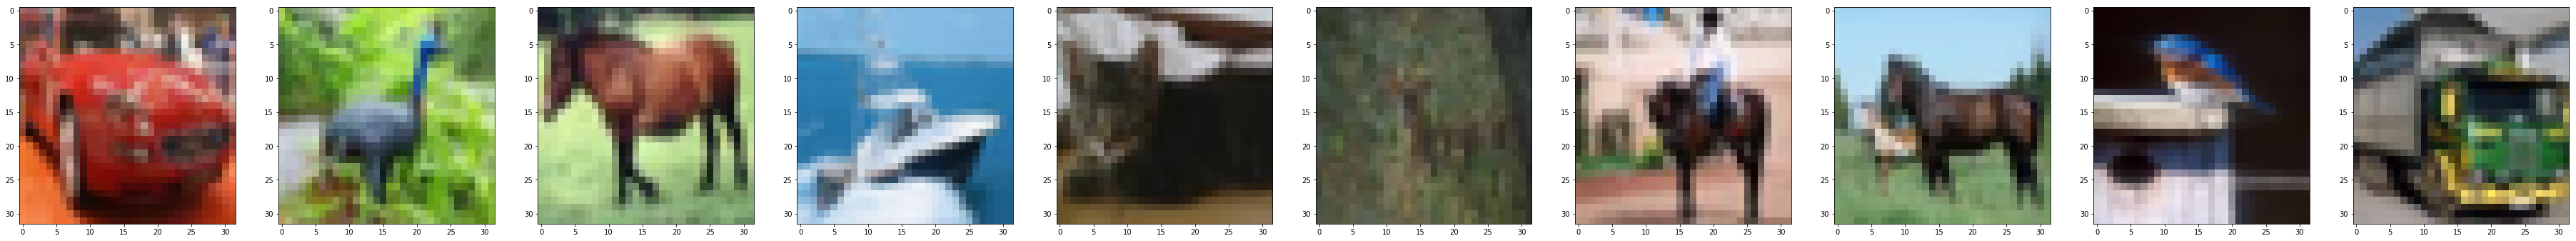

In [22]:
from keras.datasets import cifar10
import numpy as np
import cv2
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape,y_train.shape)




label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def load_cfar10_batch(cifar10_dataset_folder_path, batch_id):
    with open(cifar10_dataset_folder_path + '/data_batch_' + str(batch_id), mode='rb') as file:
        batch = pickle.load(file, encoding='latin1')
    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch['labels'] 
    return features, labels

def display_stats(cifar_data,start_id = 0,show_num = 3):
    # 用于显示图像
    def show_img(imgList):
        imgNum = imgList.shape[0]
        f,(*windows) = plt.subplots(1,imgNum,figsize=(64,32))
        for index,d in enumerate(*windows):
            img = imgList[index]
            d.imshow(img)
    
    imgs, labels = cifar_data
    show_img(imgs[start_id:(show_num+start_id)])
    
    print("labels : {}".format([label_names[i[0]] for i in labels[start_id:(show_num+start_id)]]))
    
display_stats([x_train,y_train], start_id = 5,show_num = 10)

In [ ]:
import keras
from keras.datasets import cifar10
from keras.layers import Dense, Dropout, Activation, Flatten,Input,Conv2D, AveragePooling2D,MaxPooling2D,GlobalAveragePooling2D,BatchNormalization
from keras import layers
#from keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from keras.optimizers import *
from keras.models import Model



def identity_block(input_tensor, kernel_size, filters, stage, block):
    filters1, filters2, filters3 = filters
    if K.image_data_format() == 'channels_last':
        bn_axis = 3
    else:
        bn_axis = 1
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    x = Conv2D(filters1, (1, 1), name=conv_name_base + '2a')(input_tensor)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
    x = Activation('relu')(x)
    x = Conv2D(filters2, kernel_size,
               padding='same', name=conv_name_base + '2b')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1), name=conv_name_base + '2c')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)

    x = layers.add([x, input_tensor])
    x = Activation('relu')(x)
    return x


def conv_block(input_tensor, kernel_size, filters, stage, block, strides=(2, 2)):

    filters1, filters2, filters3 = filters
    if K.image_data_format() == 'channels_last':
        bn_axis = 3
    else:
        bn_axis = 1
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = Conv2D(filters1, (1, 1), strides=strides,
               name=conv_name_base + '2a')(input_tensor)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size, padding='same',
               name=conv_name_base + '2b')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1), name=conv_name_base + '2c')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)

    shortcut = Conv2D(filters3, (1, 1), strides=strides,
                      name=conv_name_base + '1')(input_tensor)
    shortcut = BatchNormalization(axis=bn_axis, name=bn_name_base + '1')(shortcut)

    x = layers.add([x, shortcut])
    x = Activation('relu')(x)
    return x


def ResNet50(include_top=True, weights='imagenet',
             input_tensor=None, input_shape=None,
             pooling=None,
             classes=1000):

    bn_axis = 3
    x = Conv2D(
        64, (7, 7), strides=(2, 2), padding='same', name='conv1')(input_tensor)
    x = BatchNormalization(axis=bn_axis, name='bn_conv1')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = conv_block(x, 3, [64, 64, 256], stage=2, block='a', strides=(1, 1))
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='b')
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='c')

    x = conv_block(x, 3, [128, 128, 512], stage=3, block='a')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='b')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='c')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='d')

    x = conv_block(x, 3, [256, 256, 1024], stage=4, block='a')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='b')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='c')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='d')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='e')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='f')

    x = conv_block(x, 3, [512, 512, 2048], stage=5, block='a')
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='b')
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='c')

    # 做 1*1 pool
    x = AveragePooling2D((1, 1), name='avg_pool')(x)

    if include_top:
        x = Flatten()(x)
        x = Dense(classes, activation='softmax', name='fc1000')(x)
    else:
        if pooling == 'avg':
            x = GlobalAveragePooling2D()(x)
        elif pooling == 'max':
            x = GlobalMaxPooling2D()(x)

    model = Model(input_tensor, x, name='resnet50')
    return model





def VGG16(include_top=True, weights=None,input_tensor=None, input_shape=None,
          pooling=None,classes=1000):

    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(input_tensor)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    if include_top:
        x = Flatten(name='flatten')(x)
        x = Dense(4096, activation='relu', name='fc1')(x)
        x = Dense(4096, activation='relu', name='fc2')(x)
        x = Dense(classes, activation='softmax', name='predictions')(x)
    else:
        if pooling == 'avg':
            x = GlobalAveragePooling2D()(x)
        elif pooling == 'max':
            x = GlobalMaxPooling2D()(x)
            
    model = Model(input_tensor, x, name='vgg16')
    return model




# 构建不同的模型进行尝试
def myModel():
    input_tensor = Input(shape=(32,32,3))
    base_model = ResNet50(input_tensor=input_tensor,weights=None, include_top=False, pooling='avg')
    x = base_model.output
    x = Dropout(0.5)(x)
    x = Dense(512, activation = 'relu', use_bias=False,name='fc')(x)
    x = Dense(10, activation='softmax', use_bias=False,name='cifar10')(x)
    model = Model(input_tensor, x)
    return model

num_classes = 10
model_name = 'model/cifar10.h5'

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = (x_train.astype('float32')-127.5)/127.5
x_test = (x_test.astype('float32')-127.5)/127.5

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


# 设置不同的优化器效果不同
model = myModel()
model.compile(optimizer=SGD(1e-3),loss= 'categorical_crossentropy', metrics=['categorical_accuracy'])

model.fit(x_train, y_train, epochs=40, shuffle=True)
model.save(model_name)

loss, accuracy = model.evaluate(x_test, y_test)
print("loss : {} accuracy:{}".format(loss, accuracy))


### 4.人脸识别项目

```
人脸识别分为3个过程
    1.人脸检测矫正过程(在图像中找出人脸,并按照关键点位置进行矫正)
    2.人脸特征提取过程(使用训练好的特征提取模型进行人脸特征提取)
    3.人脸比对(特征相似度计算过程)
    
此处分为2个过程演示:
    1.人脸识别测试流程展示
    2.人脸识别训练流程展示
```

> 1.人脸检测

```

    使用MTCNN人脸检测框架进行检测,模型参数使用作者release的caffe版本,大家可以自行训练
    
```

In [1]:
from faceRecognition.faceCorrection import *
from faceRecognition import faceDetectionLib as detect_face
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2



def to_rgb(img):
    w, h = img.shape
    ret = np.empty((w, h, 3), dtype=np.uint8)
    ret[:, :, 0] = ret[:, :, 1] = ret[:, :, 2] = img
    return ret

frame_interval = 4
minsize = 40
threshold = [ 0.7, 0.7, 0.8] 
factor = 0.709
landmark=[]
face_position=[]


image_path = "image/face_test1.png"

with tf.Graph().as_default():
    sess = tf.Session()
    with sess.as_default():
        pnet, rnet, onet = detect_face.create_mtcnn(sess, 'model/face_detect_model')


    img = cv2.imread(image_path)
    frame = img.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)     
    if gray.ndim == 2:
        gray = to_rgb(gray)
    bounding_boxes, landmarks = detect_face.detect_face(gray, minsize, pnet, rnet, onet, threshold, factor)
    
    
    print("faceNum : {}".format(landmarks.shape[1]))
    
    for i in range(landmarks.shape[1]):
        landmark = landmarks[:,i]
        face_position =bounding_boxes[i]
        landmark_alignment = []
        for k in range(5):
            landmark_alignment.append([int(landmark[k]), int(landmark[k+5])])
        alignment_img = alignment(frame,landmark_alignment)
        cutImg = frame[int(face_position[1]):int(face_position[3]),int(face_position[0]):int(face_position[2])]
        cv2.circle(frame,(int(landmark[0]),int(landmark[5])), 5, (0,0,255),-1)
        cv2.circle(frame,(int(landmark[1]),int(landmark[6])), 5, (0,0,255),-1)
        cv2.circle(frame,(int(landmark[2]),int(landmark[7])), 5, (0,0,255),-1)
        cv2.circle(frame,(int(landmark[3]),int(landmark[8])), 5, (0,0,255),-1)
        cv2.circle(frame,(int(landmark[4]),int(landmark[9])), 5, (0,0,255),-1)
        cv2.rectangle(frame, (int(face_position[0]), int(face_position[1])), (int(face_position[2]), int(face_position[3])), (0, 255, 0), 3)
        xmin,ymin,xmax,ymax = int(face_position[0]), int(face_position[1]),int(face_position[2]), int(face_position[3])
        
        
        img_alignment = alignment(img,landmark_alignment)
        
        
        # 显示原图,检测效果图,切割图,矫正图
        f,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,16))
        ax1.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
        ax2.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))
        ax3.imshow(cv2.cvtColor(cv2.resize(img[ymin:ymax,xmin:xmax],(96,112)),cv2.COLOR_BGR2RGB))
        ax4.imshow(cv2.cvtColor(img_alignment,cv2.COLOR_BGR2RGB))
        
    

/Users/shang/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


faceNum : 1


/Users/shang/jupyter_workspace/培训教程/faceRecognition/faceCorrection.py:47: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  r, _, _, _ = lstsq(X, U)


> 2.人脸特征提取

In [2]:

import tensorflow as tf
import cv2
from scipy.io import loadmat
import numpy as np
import os
from faceRecognition.faceFeatureExtract import SphereFace

model_path="model/feature_extract_model/SphereFace_sphere_model.ckpt-49000"
network = SphereFace()
inputs = tf.placeholder(tf.float32, shape=[1,112,96,3])
features=network(inputs)
  
sess = tf.Session()
saver = tf.train.Saver()
saver.restore(sess, model_path)


inputs.shape is : (1, 112, 96, 3)
INFO:tensorflow:Restoring parameters from model/feature_extract_model/SphereFace_sphere_model.ckpt-49000


In [3]:
from numpy import linalg as LA

def cal_distance(feature_1,feature_2):
    return feature_1.dot(feature_2)/(LA.norm(feature_1)*LA.norm(feature_2)+1e-6)


def getImgFeature(imgPath):
    
    frame=cv2.imread(imgPath)
    landmark_frame = frame.copy()  
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)    
    
    img = to_rgb(gray)
    bounding_boxes, landmarks = detect_face.detect_face(img, minsize, pnet, rnet, onet, threshold, factor)
    landmark = landmarks[:,0]
    landmark_alignment=[]
    for i in range(5):
        landmark_alignment.append([int(landmark[i]), int(landmark[i+5])])
    
    img=alignment(landmark_frame,landmark_alignment)
    
    
    # 做特征提取
    def per_image_standardization(img):
        num_compare = img.shape[0] * img.shape[1] * 3
        img_t = (img - np.mean(img)) / max(np.std(img), 1 / num_compare)
        return img_t
    
    print("img.shape : {}".format(img.shape))
    img = per_image_standardization(img)
    
    img=np.reshape(img,[1,112,96,3],np.float32)
    face_Feature = sess.run(features,feed_dict={inputs: img})[0]
    return face_Feature

image_path1="image/face_test1.png"
face_feature1 = getImgFeature(image_path1)

image_path2 = "image/face_test2.png"
face_feature2 = getImgFeature(image_path2)


/Users/shang/jupyter_workspace/培训教程/faceRecognition/faceCorrection.py:47: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  r, _, _, _ = lstsq(X, U)


img.shape : (112, 96, 3)
img.shape : (112, 96, 3)


> 3.人脸比对

In [ ]:
cos_dis = cal_distance(face_feature1,face_feature2)

f,(ax1,ax2) = plt.subplots(1,2,figsize=(16,6))
ax1.imshow(cv2.cvtColor(cv2.imread(image_path1),cv2.COLOR_BGR2RGB))
ax2.imshow(cv2.cvtColor(cv2.imread(image_path2),cv2.COLOR_BGR2RGB))
print(" similar is : {} .".format(cos_dis))



#### 人脸模型训练